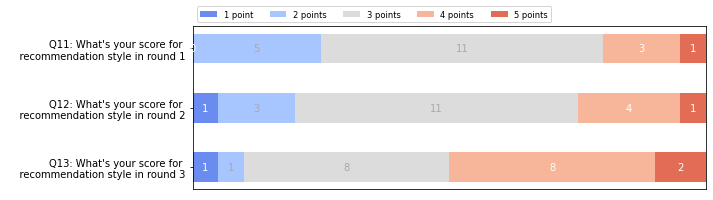

In [48]:
import numpy as np
import matplotlib.pyplot as plt



results1 = {
    '''Q1: I will watch one movie 
    in the future every''': [2, 0, 16, 1, 1],
    '''Q2: I will visit a movie recommendation 
    website I think in the future every''': [1, 2, 14, 1, 2],
    '''Q5: I will use a Recommend System 
    I think in the future once every''': [1, 2, 12, 5, 0]
}
category_names1 = ['1 day', '3 days',
                  '7 days', '14 days', '30 days and above']

results2 = {
    '''Q11: What's your score for 
    recommendation style in round 1''': [0, 5, 11, 3, 1],
    '''Q12: What's your score for 
    recommendation style in round 2''': [1, 3, 11, 4, 1],
    '''Q13: What's your score for 
    recommendation style in round 3''': [1, 1, 8, 8, 2]
}
category_names2 = ['1 point', '2 points',
                  '3 points', '4 points', '5 points']

category_names3 = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results3 = {
    '''Q3: I have know Recommendation  
    System more after the User Study''': [1, 7, 6, 6, 0],
    '''Q4: I have know Explainable 
    Recommendation System more after the User Study''': [1, 5, 7, 2, 5],
    '''Q6: My overall experience with 
    Recommend System after the 
    User Study is very well.''': [1, 6, 7, 4, 2],
    '''Q7: I think that this recommendation
    system recommended the right movies to me.''': [2, 5, 6, 6, 1],
    '''Q8: The explanation adaptation (from round1
    to round2 to round3) is helpful to improve
    the explainability of this Recommend System.''': [0, 5, 12, 2, 1],
    '''Q9: I think that the recommended movies
    are more and more in line with what I
    expect (from round1 to round2 to round3).''': [2, 2, 10, 5, 1],
    '''Q10: I think that the recommended movies
    are more and more in line with what I 
    really need (from round1 to round2 to round3).''': [1, 4, 12, 2, 1],
    '''Q14: I think there are many explanation types
    for this movie recommendation system.''':[1, 3, 11, 4, 1],
    '''Q15: I think this movie recommendation 
    system often recommends new movies, 
    which I have never seen, to me.''':[1, 3, 11, 3, 2],
    '''Q16: I think this movie recommendation 
    system recommends movies that do not match
    with me, but I am satisfied with that.''':[0, 8, 5, 4, 3],
    '''Q17: I can understand the reasons given 
    by the movie recommendation 
    system and believe them.''':[1, 5, 11, 1, 2]
}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('coolwarm')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 3))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results2, category_names2)
plt.show()